In [1]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt

In [2]:
#################
## Criar dados ##
#################

# Sequência de x
x = np.linspace(0,100,100)

# y = função de x mais um erro aleatório.
y = x * 10 + np.random.normal(0,50,len(x))

y

array([  -19.68852454,    12.27955902,    14.22148814,    35.12199064,
          20.7205216 ,   -13.24200895,    47.15469727,    14.14015196,
         173.29895584,    94.22895689,   101.58368676,    66.40177016,
          86.55208283,   184.05375105,    31.54908153,   172.55207331,
         190.6277751 ,   207.57369417,    91.00629945,   148.34157043,
         215.4321372 ,   205.75492397,   216.22769428,   224.71621962,
         302.6382021 ,   299.5585034 ,   212.79703807,   384.604897  ,
         297.84952479,   281.88601071,   280.85993373,   260.44791991,
         280.68408826,   420.19284068,   339.54650705,   372.87640511,
         367.77669733,   323.95374008,   381.0022845 ,   453.47321655,
         425.23089582,   423.57139441,   440.52102849,   329.36514532,
         484.80252072,   430.41142336,   415.38067471,   446.49143009,
         473.62926597,   475.76865477,   483.83109484,   380.99592911,
         567.10743706,   650.10383287,   591.30206727,   614.61780477,
      

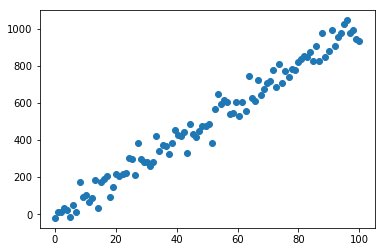

In [3]:
## Plotar correlação

fig1 = plt.figure()
plt.scatter(x,y)
plt.show()

In [4]:
#######################
## Mínimos quadrados ##
#######################

## Cálculo da soma dos quadrados dos resíduos

def sum_sq_resid(beta, x, y, scale=1/10000):
    vec = [(y_i - beta * x_i) ** 2 for (y_i, x_i) in zip(y,x)]
    return scale * sum(vec)

In [5]:
## Estimação da soma dos quadrados dos resíduos com parâmetros diferentes

sample = range(-50,50)

results = []
for i in sample:
    results.append(sum_sq_resid(i, x, y))

results

[120936.71402849372,
 116944.90674087826,
 113020.1028202662,
 109162.3022666575,
 105371.50508005214,
 101647.71126045016,
 97990.920807851566,
 94401.133722256331,
 90878.350003664469,
 87422.569652075952,
 84033.792667490838,
 80712.019049909053,
 77457.248799330613,
 74269.48191575559,
 71148.718399183927,
 68094.958249615607,
 65108.201467050734,
 62188.448051489155,
 59335.698002930927,
 56549.951321376087,
 53831.208006824629,
 51179.468059276522,
 48594.731478731788,
 46076.998265190428,
 43626.268418652427,
 41242.5419391178,
 38925.818826586532,
 36676.099081058645,
 34493.382702534102,
 32377.669691012939,
 30328.960046495147,
 28347.253768980707,
 26432.550858469647,
 24584.851314961947,
 22804.155138457623,
 21090.462328956655,
 19443.772886459061,
 17864.08681096484,
 16351.404102473974,
 14905.724760986484,
 13527.048786502359,
 12215.376179021594,
 10970.706938544205,
 9793.0410650701815,
 8682.3785585995138,
 7638.7194191322287,
 6662.0636466683054,
 5752.4112412077448

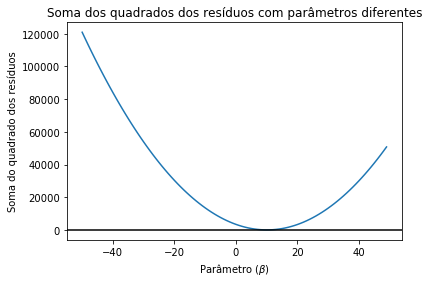

In [6]:
# Plotar função    
fig2 = plt.figure()
plt.plot(sample, results)
plt.axhline(np.min(results), color='black')
plt.title('Soma dos quadrados dos resíduos com parâmetros diferentes')
plt.xlabel(r'Parâmetro ($\beta$)')
plt.ylabel('Soma do quadrado dos resíduos')
plt.show()

In [7]:
##############################
## Algoritmo de minimização ##
##############################

## Definir algoritmo
def minimize(x, y, alpha=0.001, num_inters=250):
    beta = 0
    f = lambda beta: sum_sq_resid(beta, x, y)
    
    path = []    
    betas = []
    for i in range(0,num_inters):
        beta = beta - alpha * derivative(f, x0=beta, dx=1e-10)
        betas.append(beta)
        path.append(sum_sq_resid(beta, x, y))
        
    return(beta, betas, path)
    
# Rodar função   
beta_algoritmo, betas, path = minimize(x,y)

In [8]:
# Imprimir beta
print(beta_algoritmo)

10.0762186328


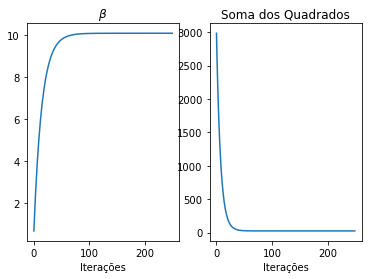

In [9]:
# Plotar convergência
f, ax = plt.subplots(1,2)
ax[0].plot(betas)
ax[0].set_title(r'$\beta$')
ax[0].set_xlabel('Iterações')
ax[1].plot(path)
ax[1].set_title('Soma dos Quadrados')
ax[1].set_xlabel('Iterações')
plt.show()

In [10]:
# Statsmodels

import statsmodels.formula.api as smf
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y})

reg_sem_constante = smf.ols('y ~ x - 1', data=df).fit()

reg_sem_constante.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.401e+04
Date:                Wed, 29 Nov 2017   Prob (F-statistic):          1.97e-108
Time:                        12:02:53   Log-Likelihood:                -531.14
No. Observations:                 100   AIC:                             1064.
Df Residuals:                      99   BIC:                             1067.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x             10.0762      0.085    118.349      0.000       9.907      10.245
==============================================================================
Omnibus:                        0.289   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.116
Skew:                           0.081   Prob(JB):                        0.944
Kurtosis:                       3.039   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
##################################
## Solução numérica por cálculo ##
##################################

def regressao(x, y):
    beta = (np.cov(x,y, ddof=1) / np.var(x, ddof=1))[0,1]
    alpha = np.mean(y) - np.mean(x) * beta
    return alpha, beta

alpha_regressao, beta_regressao = regressao(x,y)

print('alpha: {} \n'.format(alpha_regressao) + 'beta: {}'.format(beta_regressao))

alpha: -10.602408607623431 
beta: 10.234456270263804


In [12]:
reg_completa = smf.ols('y ~ x ', data=df).fit()

reg_completa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3673.
Date:                Wed, 29 Nov 2017   Prob (F-statistic):           1.71e-79
Time:                        12:02:53   Log-Likelihood:                -530.55
No. Observations:                 100   AIC:                             1065.
Df Residuals:                      98   BIC:                             1070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6024      9.774     -1.085      0.281     -29.998       8.793
x             10.2345      0.169     60.609      0.000       9.899      10.570
==============================================================================
Omnibus:                        0.273   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.872   Jarque-Bera (JB):                0.102
Skew:                           0.076   Prob(JB):                        0.950
Kurtosis:                       3.039   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
###############
## Aplicação ##
###############


file = 'https://github.com/omercadopopular/cgoes/blob/master/StatsPython/data/wooldridge/airfare.dta?raw=true'
df = pd.read_stata(file)

df = df.drop(['ldist', 'y98', 'y99', 'y00', 'lfare',
             'ldistsq', 'concen', 'lpassen'], axis=1)

df = df.rename(columns = {'fare':'preco'})

df

,year,id,dist,passen,preco,bmktshr
0,1997,1,528,152,106,0.8386
1,1998,1,528,265,106,0.8133
2,1999,1,528,336,113,0.8262
3,2000,1,528,298,123,0.8612
4,1997,2,861,282,104,0.5798
5,1998,2,861,178,105,0.5817
6,1999,2,861,204,115,0.7319
7,2000,2,861,190,129,0.5386
8,1997,3,852,241,207,0.8180
9,1998,3,852,253,188,0.8172


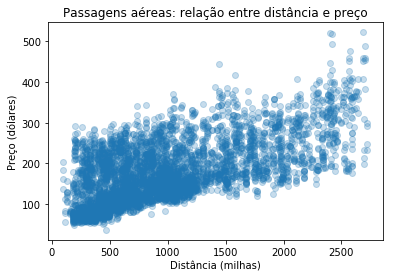

In [14]:
plt.scatter('dist', 'preco',
           data=df, alpha=0.25)
plt.xlabel('Distância (milhas)')
plt.ylabel('Preço (dólares)')
plt.title('Passagens aéreas: relação entre distância e preço')
plt.show()

In [15]:
# Rodar regressão
reg = smf.ols('preco ~ dist', data=df).fit()

# Imprimir resultados
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  preco   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     2923.
Date:                Wed, 29 Nov 2017   Prob (F-statistic):               0.00
Time:                        12:02:57   Log-Likelihood:                -25225.
No. Observations:                4596   AIC:                         5.045e+04
Df Residuals:                    4594   BIC:                         5.047e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.2614      1.643     62.868      0.000     100.041     106.481
dist           0.0763      0.001     54.063      0.000       0.074       0.079
==============================================================================
Omnibus:                      311.033   Durbin-Watson:                   0.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.797
Skew:                           0.676   Prob(JB):                     6.10e-80
Kurtosis:                       2.726   Cond. No.                     2.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Imprimir só os coeficientes
print(reg.params)

Intercept    103.261370
dist           0.076318
dtype: float64


In [17]:
# Criar valores preditos pela equação
preco_hat = reg.params[0] + reg.params[1] * df['preco']
preco_hat = reg.predict()
df['preco_hat'] = preco_hat

df['preco_hat']

0       143.557301
1       143.557301
2       143.557301
3       143.557301
4       168.971213
5       168.971213
6       168.971213
7       168.971213
8       168.284350
9       168.284350
10      168.284350
11      168.284350
12      158.515639
13      158.515639
14      158.515639
15      158.515639
16      185.150640
17      185.150640
18      185.150640
19      185.150640
20      127.530510
21      127.530510
22      127.530510
23      127.530510
24      200.185296
25      200.185296
26      200.185296
27      200.185296
28      150.120654
29      150.120654
           ...    
4566    130.049006
4567    130.049006
4568    157.676141
4569    157.676141
4570    157.676141
4571    157.676141
4572    187.592817
4573    187.592817
4574    187.592817
4575    187.592817
4576    126.004149
4577    126.004149
4578    126.004149
4579    126.004149
4580    118.524980
4581    118.524980
4582    118.524980
4583    118.524980
4584    165.384264
4585    165.384264
4586    165.384264
4587    165.

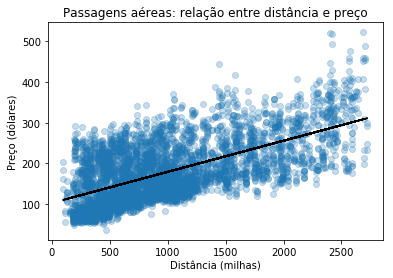

In [18]:
plt.scatter('dist', 'preco',
           data=df, alpha=0.25)
plt.plot('dist',
         'preco_hat',
         data=df,
         color='black')
plt.xlabel('Distância (milhas)')
plt.ylabel('Preço (dólares)')
plt.title('Passagens aéreas: relação entre distância e preço')
plt.show()

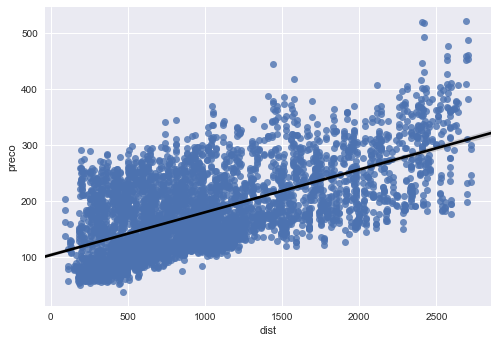

In [19]:
# Seaborn

import seaborn as sns

sns.regplot('dist', 'preco', data=df,
            line_kws={'color': 'black'})
plt.show()